# Hipótesis y preguntas de investigación 

Se plantean 6 preguntas de investigación basadas en supuestos o creencias preliminares sobre el fenómeno del divorcio, con el propósito de explorar posibles patrones y relaciones entre variables relevantes. Se busca contrastar estas intuiciones iniciales con la evidencia resultante, evaluando si los datos respaldan o cuestionan dichas creencias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('../data/data_divorce.csv')

### Hipotesis 1 
¿Ha aumentado significativamente la tasa de divorcios en Guatemala durante el periodo 2012-2023, sugiriendo un cambio en las dinámicas familiares guatemaltecas? ¿Promedio anual de divorcios? 

In [7]:
# Divorcios por año
divorcios_año = df['AÑOREG'].value_counts().sort_index()

# Estadísticas básicas
promedio_anual = divorcios_año.mean()
total_divorcios = divorcios_año.sum()
tasa_crecimiento = ((divorcios_año.iloc[-2] - divorcios_año.iloc[0]) / divorcios_año.iloc[0]) * 100 

print(f"Promedio anual: {promedio_anual:.0f} divorcios")
print(f"Total período: {total_divorcios:.0f} divorcios")
print(f"Tasa de crecimiento 2012-2022: {tasa_crecimiento:.2f}%")

Promedio anual: 5965 divorcios
Total período: 71576 divorcios
Tasa de crecimiento 2012-2022: 158.97%


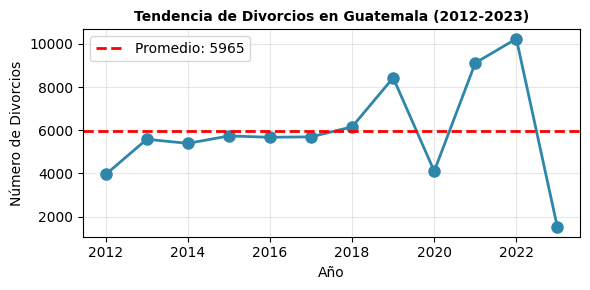

In [9]:
# Gráfico de tendencia
plt.figure(figsize=(6, 3))
plt.plot(divorcios_año.index, divorcios_año.values, marker='o', linewidth=2, markersize=8, color='#2E86AB')
plt.axhline(y=promedio_anual, color='red', linestyle='--', linewidth=2, label=f'Promedio: {promedio_anual:.0f}')
plt.title('Tendencia de Divorcios en Guatemala (2012-2023)', fontsize=10, fontweight='bold')
plt.xlabel('Año', fontsize=10)
plt.ylabel('Número de Divorcios', fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
# Análisis de tendencia con regresión lineal (excluyendo 2023)
divorcios_completos = divorcios_año[divorcios_año.index < 2023.0]
años = divorcios_completos.index.astype(float)
valores = divorcios_completos.values

# Regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(años, valores)

print(f"Pendiente (cambio anual promedio): {slope:.2f} divorcios/año")
print(f"R²: {r_value**2:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print("La tendencia es estadísticamente significativa (p < 0.05)")
else:
    print("La tendencia NO es estadísticamente significativa (p >= 0.05)")

Pendiente (cambio anual promedio): 432.40 divorcios/año
R²: 0.5054
P-value: 0.014184
La tendencia es estadísticamente significativa (p < 0.05)


In [15]:
# Análisis por períodos
periodo_2012_2015 = divorcios_completos[divorcios_completos.index <= 2015.0].mean()
periodo_2016_2019 = divorcios_completos[(divorcios_completos.index >= 2016.0) & (divorcios_completos.index <= 2019.0)].mean()
periodo_2020_2022 = divorcios_completos[divorcios_completos.index >= 2020.0].mean()

periodos_df = pd.DataFrame({
    'Período': ['2012-2015', '2016-2019', '2020-2022'],
    'Promedio Anual': [periodo_2012_2015, periodo_2016_2019, periodo_2020_2022]
})
periodos_df

,Período,Promedio Anual
0,2012-2015,5165.250000
1,2016-2019,6489.000000
2,2020-2022,7818.333333


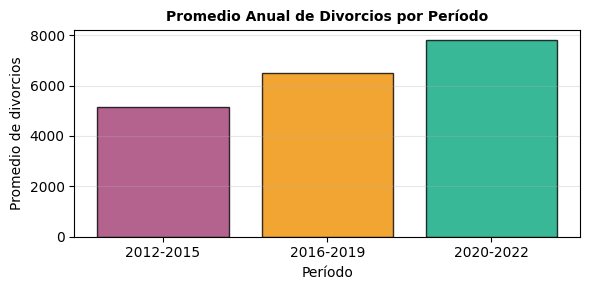

In [17]:
# Gráfico comparativo por períodos
plt.figure(figsize=(6, 3))
plt.bar(periodos_df['Período'], periodos_df['Promedio Anual'], color=['#A23B72', '#F18F01', '#06A77D'], 
        edgecolor='black', alpha=0.8)
plt.title('Promedio Anual de Divorcios por Período', fontsize=10, fontweight='bold')
plt.xlabel('Período', fontsize=10)
plt.ylabel('Promedio de divorcios', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### Hipotesis 2

Los divorcios se concentran principalmente en departamentos urbanos como Guatemala, Escuintla y Sacatepéquez, mientras que departamentos rurales presentan tasas significativamente menores. 

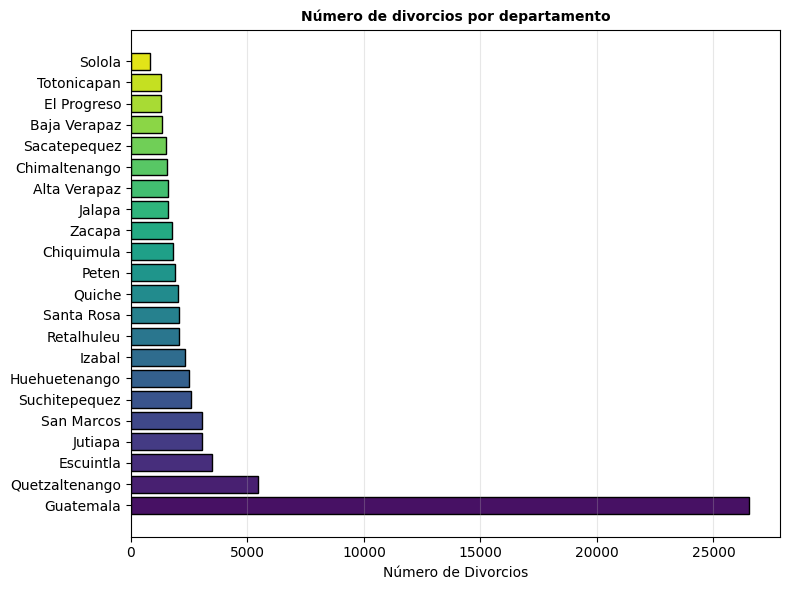

In [25]:
divorcios_depto = df['DEPOCU'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.barh(range(len(divorcios_depto)), divorcios_depto.values, color=sns.color_palette("viridis", len(divorcios_depto)), edgecolor='black')
plt.yticks(range(len(divorcios_depto)), divorcios_depto.index)
plt.xlabel('Número de Divorcios', fontsize=10)
plt.title('Número de divorcios por departamento', fontsize=10, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

Promedio urbanos: 7804 divorcios por departamento
Promedio rurales: 1876 divorcios por departamento


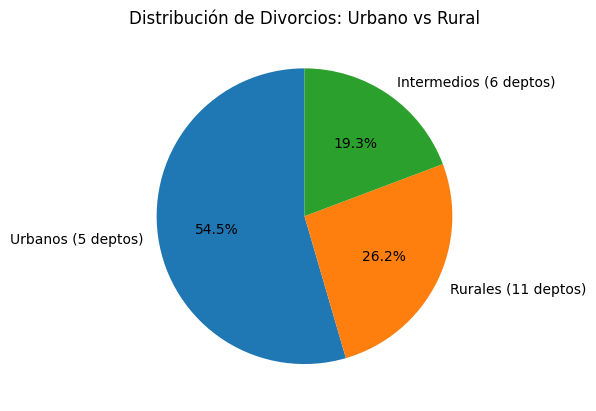

In [ ]:
# Clasificación urbano/rural
deptos_urbanos = ['Guatemala', 'Escuintla', 'Sacatepequez', 'Quetzaltenango', 'Retalhuleu']
deptos_rurales = ['Alta Verapaz', 'Baja Verapaz', 'Quiche', 'Huehuetenango', 'San Marcos', 'Solola' 
                  'El Progreso', 'Jalapa', 'Jutiapa', 'Izabal', 'Totonicapan']

divorcios_urbanos = df[df['DEPOCU'].isin(deptos_urbanos)].shape[0]
divorcios_rurales = df[df['DEPOCU'].isin(deptos_rurales)].shape[0]
divorcios_intermedios = total_divorcios - divorcios_urbanos - divorcios_rurales

clasificacion_df = pd.DataFrame({
    'Clasificación': ['Urbanos (5 deptos)', 'Rurales (11 deptos)', 'Intermedios (6 deptos)'],
    'Divorcios': [divorcios_urbanos, divorcios_rurales, divorcios_intermedios],
    'Porcentaje': [
        round((divorcios_urbanos/total_divorcios)*100, 2),
        round((divorcios_rurales/total_divorcios)*100, 2),
        round((divorcios_intermedios/total_divorcios)*100, 2)
    ]
})
clasificacion_df

# Promedio por departamento
promedio_urbanos = divorcios_urbanos / len(deptos_urbanos)
promedio_rurales = divorcios_rurales / len(deptos_rurales)

print(f"Promedio urbanos: {promedio_urbanos:.0f} divorcios por departamento")
print(f"Promedio rurales: {promedio_rurales:.0f} divorcios por departamento")

# Gráfico de pastel: Urbano vs Rural vs Otros
plt.figure()

plt.pie(
    clasificacion_df['Divorcios'],
    labels=clasificacion_df['Clasificación'],
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Distribución de Divorcios: Urbano vs Rural')
plt.show()


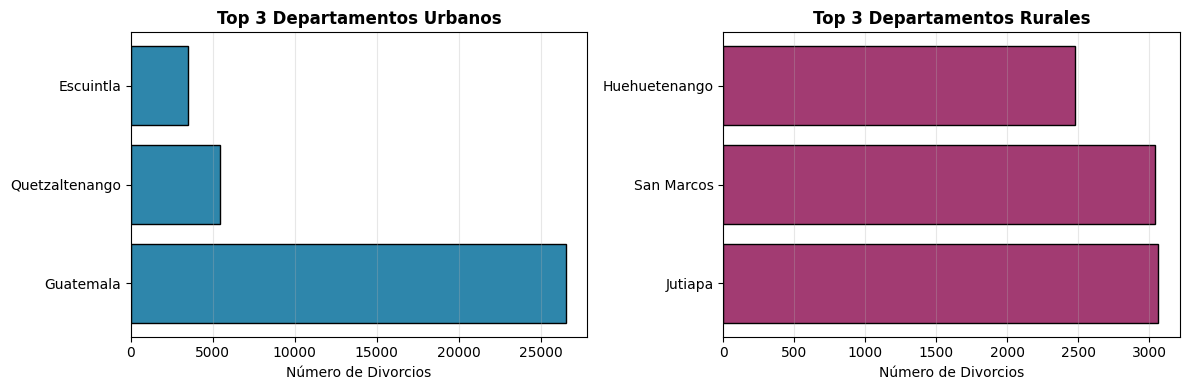

In [ ]:
# Top 3 urbanos vs Top 3 rurales
urbanos_top3 = []
for depto in deptos_urbanos:
    if depto in divorcios_depto.index:
        urbanos_top3.append((depto, divorcios_depto[depto]))

rurales_top3 = []
for depto in deptos_rurales:
    if depto in divorcios_depto.index:
        rurales_top3.append((depto, divorcios_depto[depto]))

urbanos_top3 = sorted(urbanos_top3, key=lambda x: x[1], reverse=True)[:3]
rurales_top3 = sorted(rurales_top3, key=lambda x: x[1], reverse=True)[:3]

# Gráfico comparativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Urbanos
deptos_u = [x[0] for x in urbanos_top3]
valores_u = [x[1] for x in urbanos_top3]
ax1.barh(range(len(deptos_u)), valores_u, color='#2E86AB', edgecolor='black')
ax1.set_yticks(range(len(deptos_u)))
ax1.set_yticklabels(deptos_u)
ax1.set_xlabel('Número de Divorcios')
ax1.set_title('Top 3 Departamentos Urbanos', fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Rurales
deptos_r = [x[0] for x in rurales_top3]
valores_r = [x[1] for x in rurales_top3]
ax2.barh(range(len(deptos_r)), valores_r, color='#A23B72', edgecolor='black')
ax2.set_yticks(range(len(deptos_r)))
ax2.set_yticklabels(deptos_r)
ax2.set_xlabel('Número de Divorcios')
ax2.set_title('Top 3 Departamentos Rurales', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()